In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

plt.rcParams['figure.figsize'] = (10 , 5 )
plt.rcParams['figure.dpi'] = 500

sns.set_theme(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#  Q1→→→Ans→→→Fire_Dataset


In [2]:
fire = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\17_Support_Vector_Machine\forestfires.csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
fire = fire.drop_duplicates()
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
fire['month'] = fire['month'].replace({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
})
fire['day'] = fire['day'].replace({
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
})
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
fire['size_category']  = fire['size_category'].map({'small' : 0 , 'large' : 1})
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fire = fire.drop(columns=fire.iloc[: , 11 : 30 ])
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


In [8]:
x = fire.drop(columns=  'size_category')
y = fire['size_category']
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [9]:
sc = StandardScaler()

x = sc.fit_transform(x)
x

array([[-1.96435265,  0.36038654, -0.79603981, ...,  1.49437016,
        -0.06903477, -0.20279135],
       [ 1.10403336, -1.08399732, -0.00325666, ..., -1.72936355,
        -0.06903477, -0.20279135],
       [ 1.10403336,  0.84184783, -0.00325666, ..., -1.50703709,
        -0.06903477, -0.20279135],
       ...,
       [ 0.22735164,  1.32330912, -1.62485856, ...,  1.49437016,
        -0.06903477, -0.02860775],
       [ 0.22735164,  0.84184783,  0.68141971, ..., -0.00633347,
        -0.06903477, -0.20279135],
       [ 1.54237422, -1.08399732, -2.00323234, ...,  0.27157461,
        -0.06903477, -0.20279135]])

In [10]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size= 0.2 , random_state=1)
xtrain

array([[ 2.27351643e-01, -1.08399732e+00,  7.53490902e-01, ...,
         7.71809153e-01, -6.90347669e-02, -2.02791345e-01],
       [-2.40269350e+00,  3.60386544e-01, -7.23968614e-01, ...,
        -1.72936355e+00, -6.90347669e-02, -2.02791345e-01],
       [-2.40269350e+00, -1.56545861e+00, -1.06630679e+00, ...,
         1.27204369e+00, -6.90347669e-02, -4.73371658e-02],
       ...,
       [-6.49330072e-01, -6.02536033e-01,  4.83223917e-01, ...,
         2.71574613e-01, -6.90347669e-02, -7.54312946e-02],
       [ 6.65692501e-01,  8.41847833e-01,  3.39081525e-01, ...,
        -6.33346504e-03, -6.90347669e-02,  1.68228750e+01],
       [ 1.10403336e+00,  3.60386544e-01, -1.11363449e-01, ...,
         7.71809153e-01, -6.90347669e-02, -2.02791345e-01]])

In [11]:
ytrain

42     0
59     0
390    1
79     0
431    1
      ..
258    0
73     0
400    1
238    1
37     0
Name: size_category, Length: 407, dtype: int64

In [12]:
xtest

array([[ 0.22735164,  1.32330912,  0.17692133, ...,  0.49390108,
        -0.06903477, -0.20279135],
       [ 0.6656925 ,  0.36038654,  0.26701033, ...,  0.27157461,
        -0.06903477, -0.20279135],
       [-0.21098921, -1.56545861,  0.64538411, ..., -0.50656801,
        -0.06903477, -0.20279135],
       ...,
       [ 0.6656925 ,  1.32330912, -0.16541685, ..., -0.22865993,
        -0.06903477, -0.20279135],
       [ 0.22735164,  1.32330912,  0.53727731, ...,  0.49390108,
        -0.06903477,  0.03663306],
       [ 0.22735164, -0.60253603,  0.8255621 , ...,  0.77180915,
        -0.06903477, -0.10243287]])

In [13]:
ytest

449    0
348    0
47     0
68     0
367    0
      ..
93     0
227    1
112    0
433    1
450    1
Name: size_category, Length: 102, dtype: int64

In [14]:
svc = SVC()
svc

SVC()

In [15]:
svc.fit(xtrain , ytrain)

ypred = svc.predict(xtest)
ypred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
svc.score(xtrain , ytrain) , svc.score(xtest , ytest)

(0.8058968058968059, 0.8137254901960784)

In [17]:
para = {
    'kernel' : ['rbf' ,'linear' , 'poly' ]
}

In [18]:
grid = GridSearchCV(SVC() , param_grid=para , verbose=1)

In [19]:
grid.fit(xtrain , ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear', 'poly']},
             verbose=1)

In [20]:
grid.best_params_

{'kernel': 'linear'}

In [21]:
svc = SVC(kernel='linear')
svc


SVC(kernel='linear')

In [22]:
svc.fit(xtrain , ytrain)

ypred = svc.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [23]:
svc.score(xtrain , ytrain) , svc.score(xtest , ytest)

(0.9041769041769042, 0.9117647058823529)

In [24]:
print(classification_report (ypred , ytest))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94        86
           1       0.64      1.00      0.78        16

    accuracy                           0.91       102
   macro avg       0.82      0.95      0.86       102
weighted avg       0.94      0.91      0.92       102



# Q2→→→Ans→→→Salary_Dataset

In [25]:
train = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\17_Support_Vector_Machine\SalaryData_Train(1).csv" )
test = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\17_Support_Vector_Machine\SalaryData_Test(1).csv")

In [26]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [28]:
print('train------->',train.shape)
print('test-------->',test.shape)

train-------> (30161, 14)
test--------> (15060, 14)


In [29]:
print('train------->\n',train.describe())
print('\ntest-------->\n',test.describe())

train------->
                 age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

test-------->
                 age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.28

In [30]:
print('train------->\n',train.isna().sum())
print('\ntest-------->\n',test.isna().sum())

train------->
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

test-------->
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


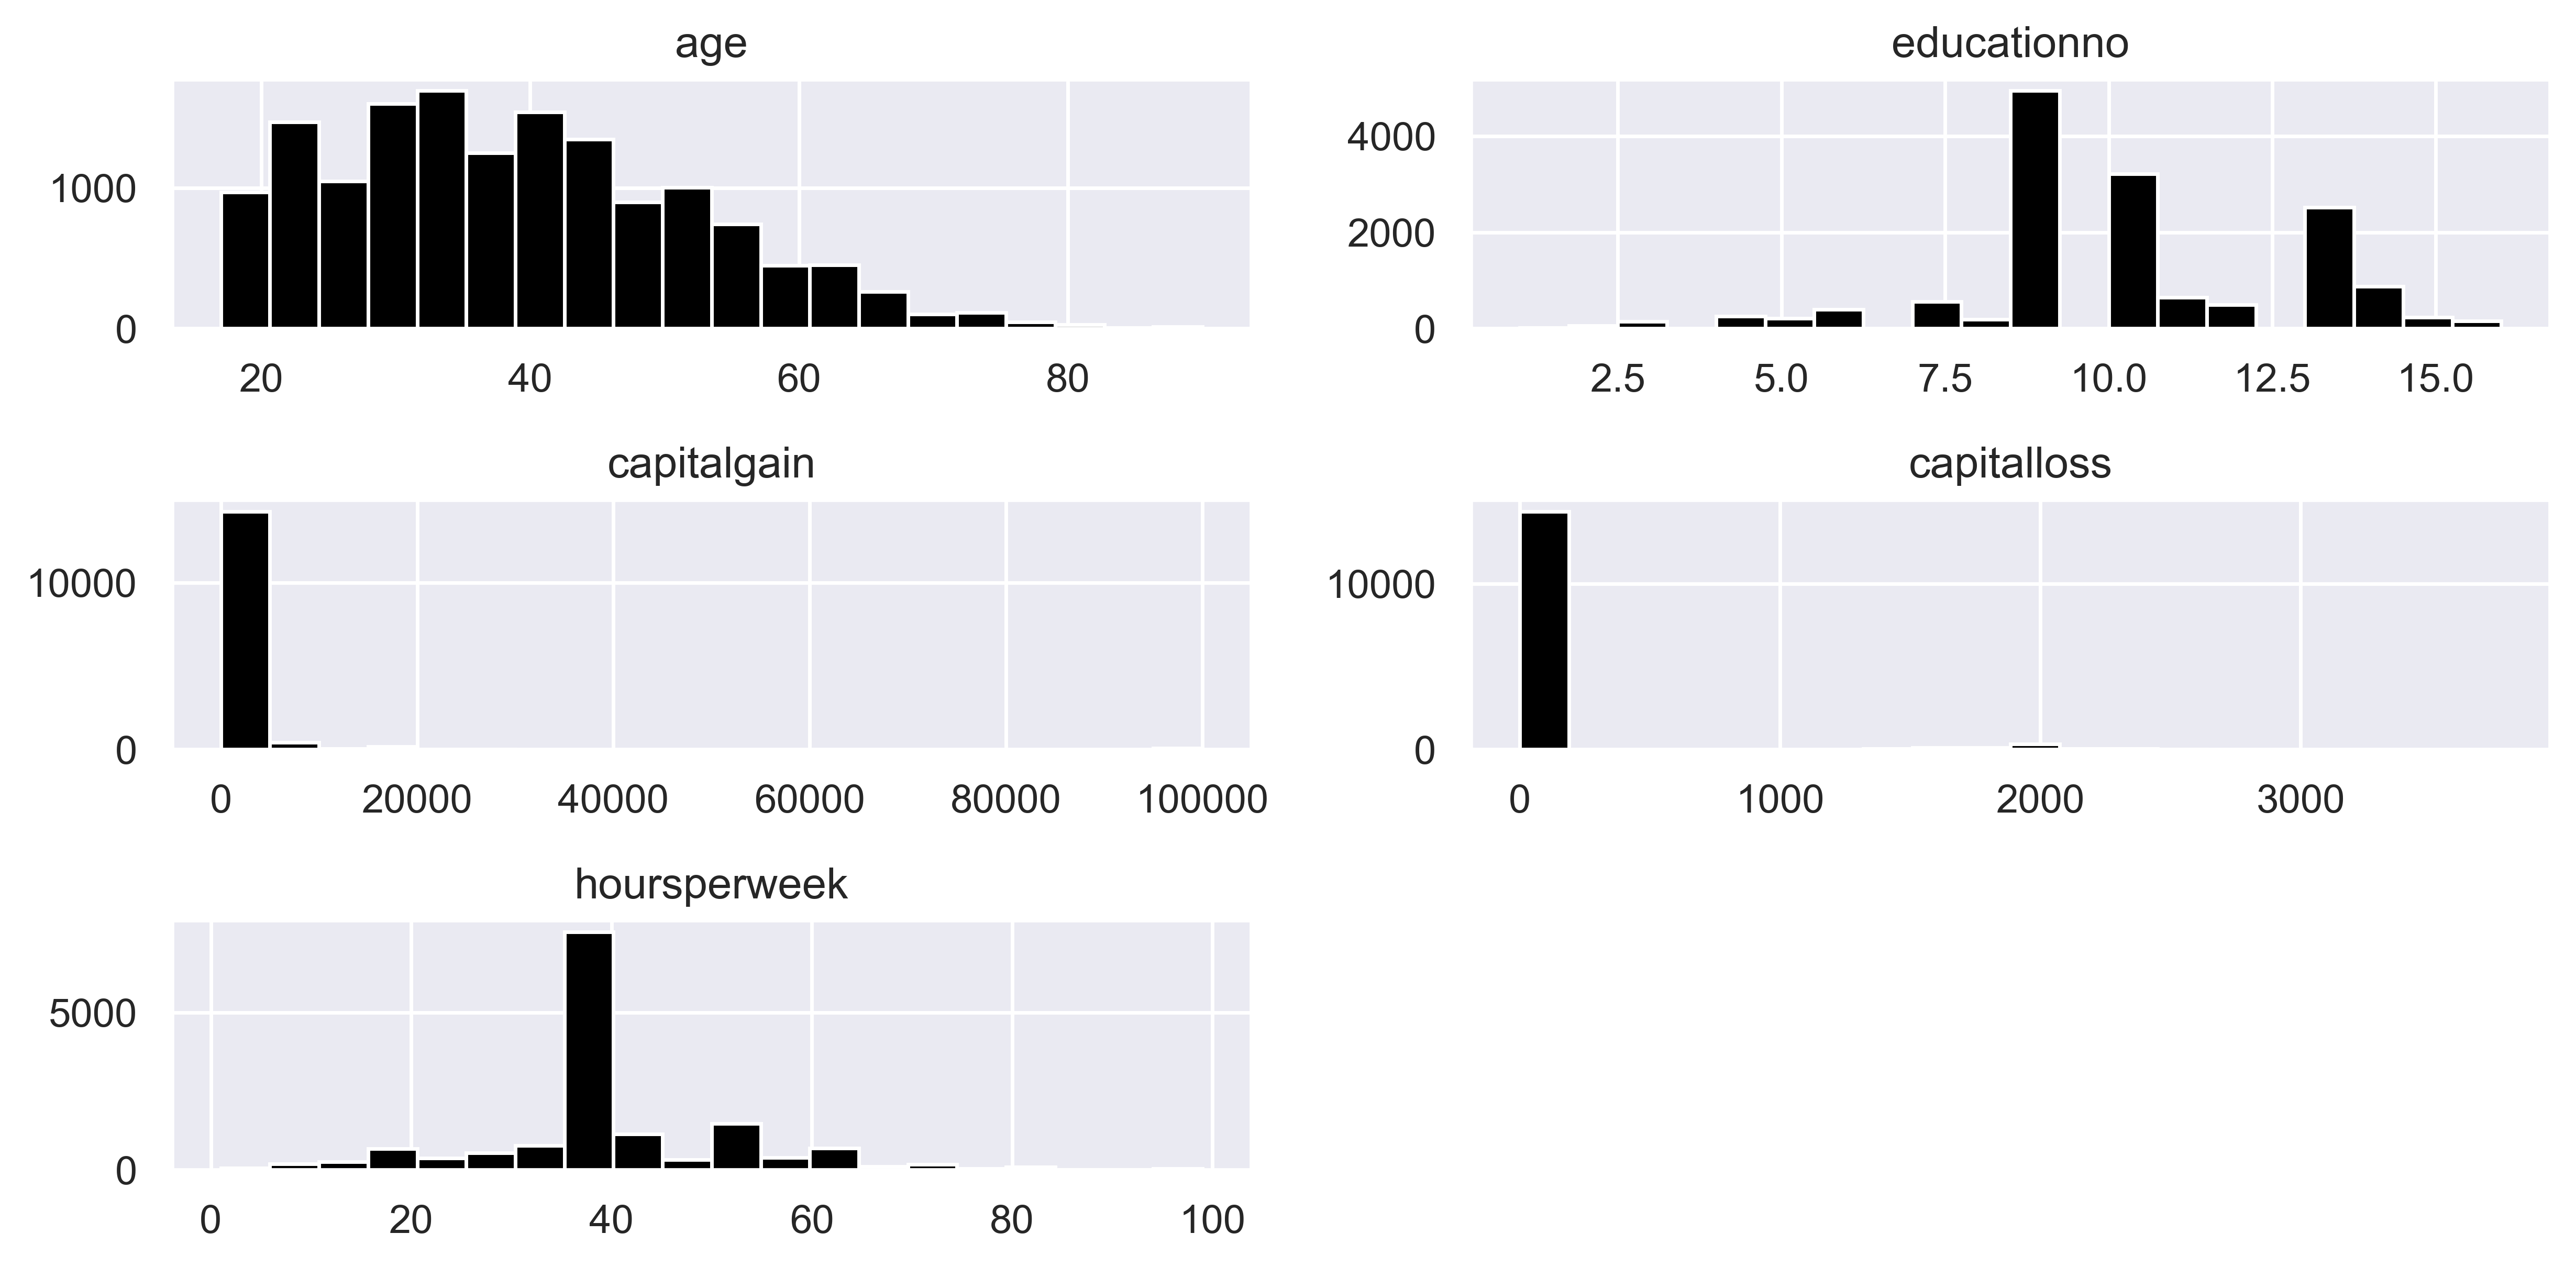

In [31]:
test.hist(bins=20 , color = 'black')
plt.tight_layout()

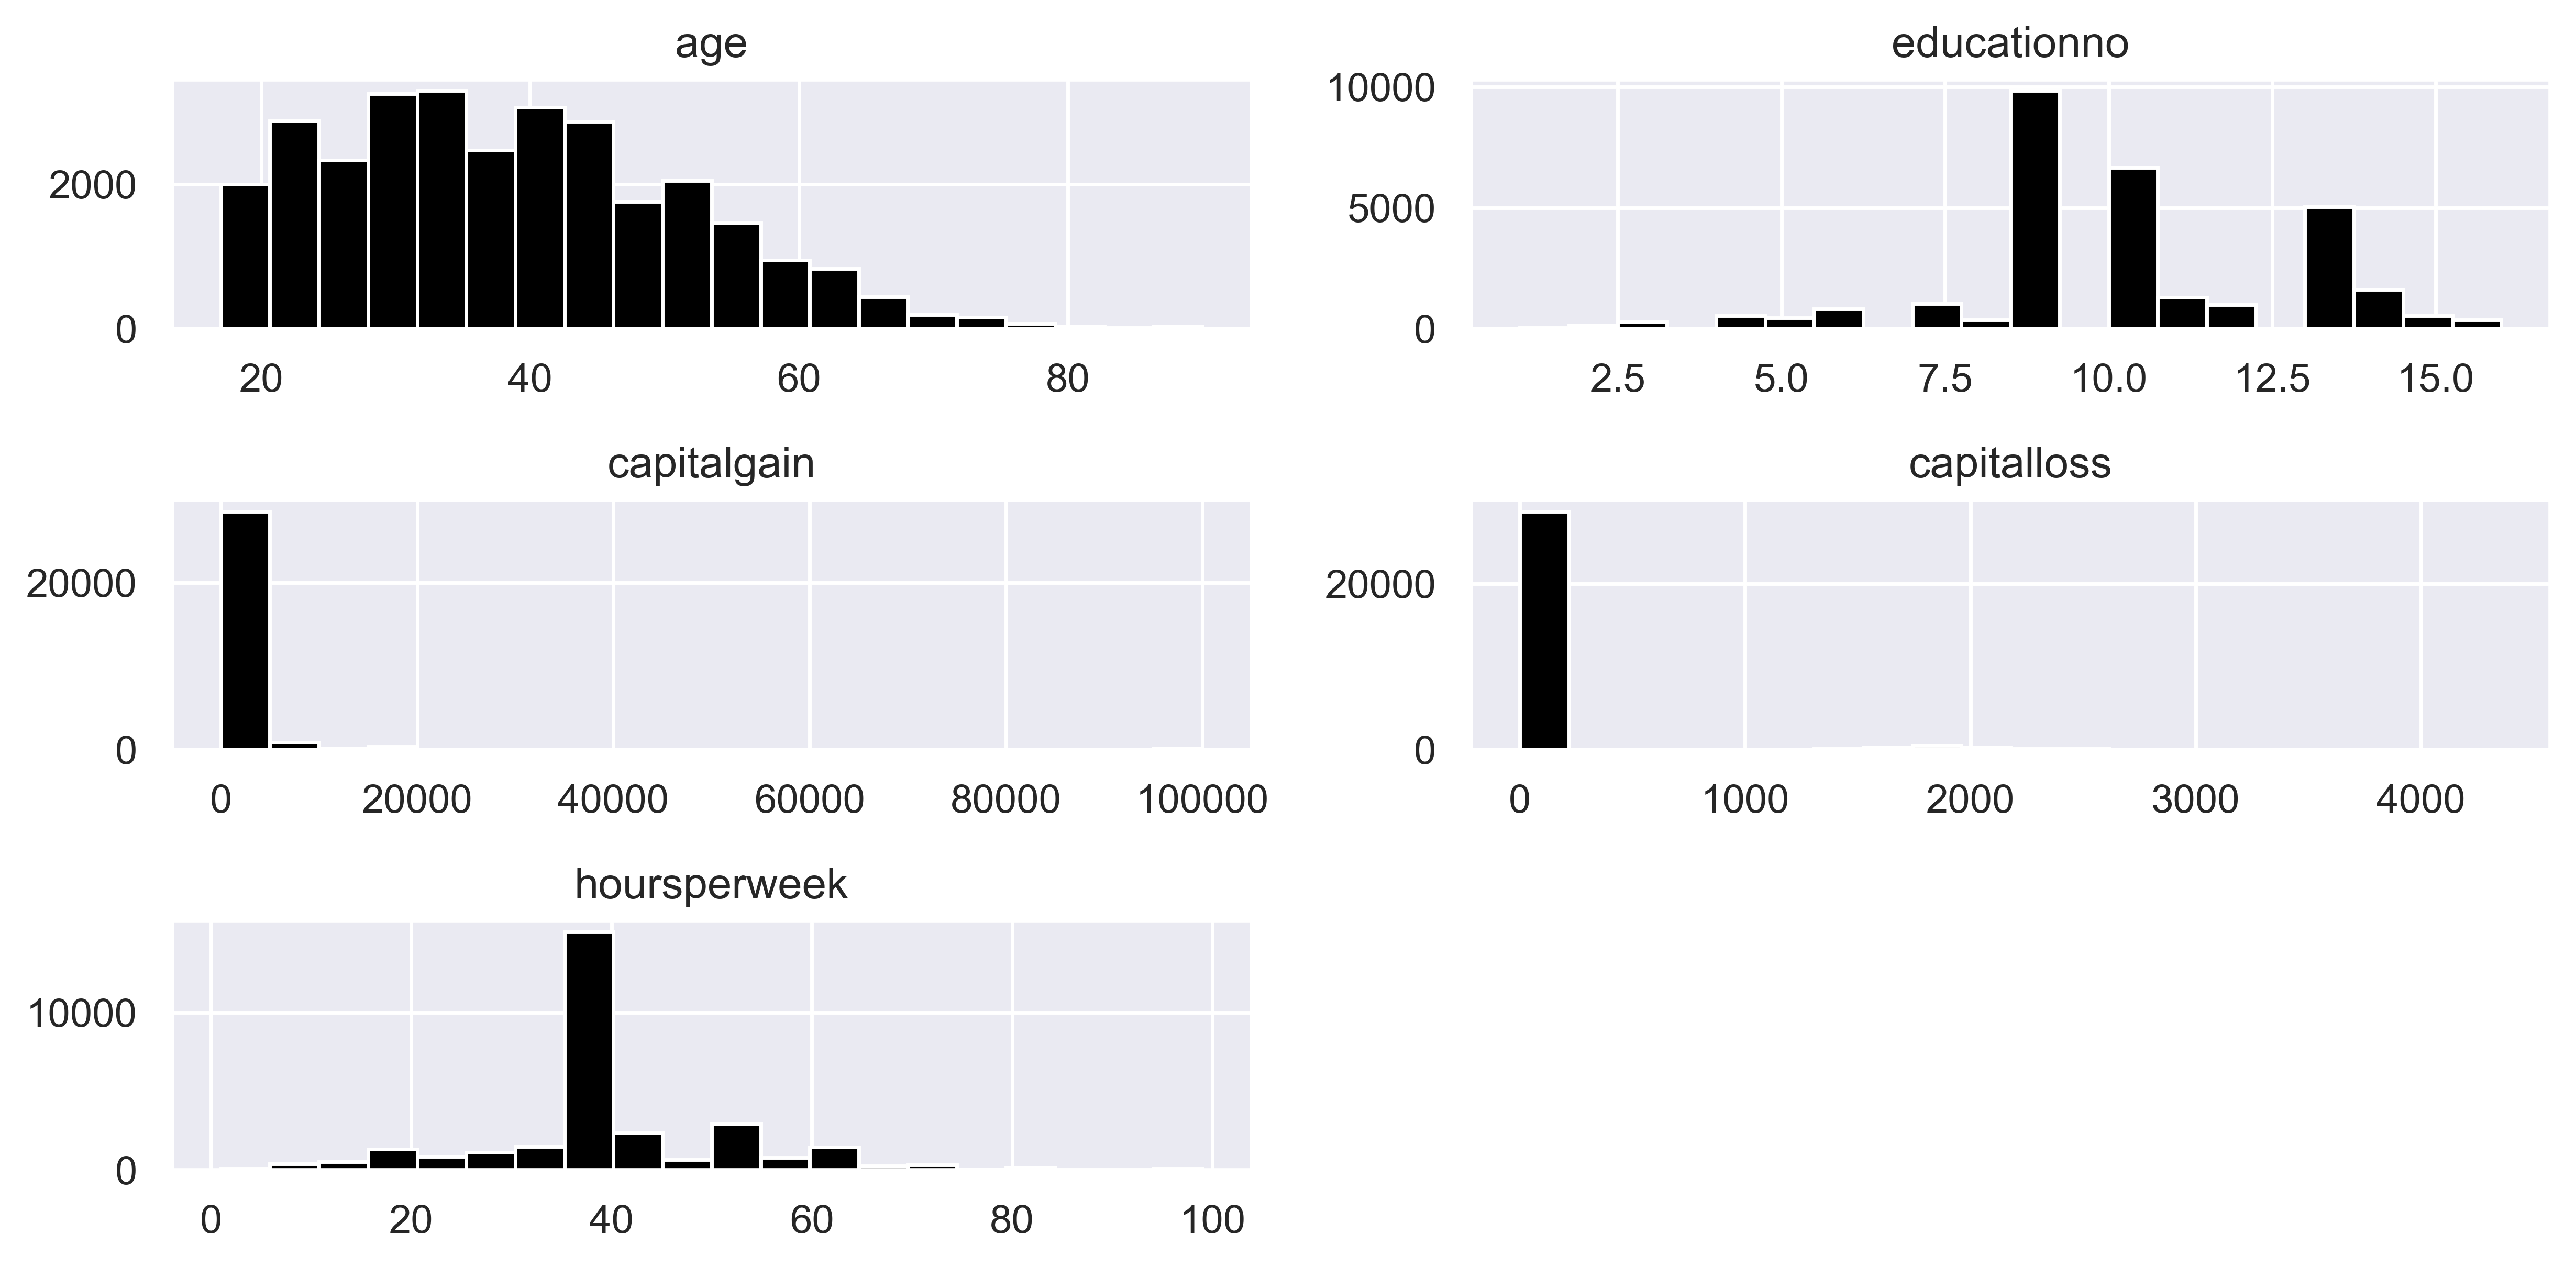

In [32]:
train.hist(bins=20 , color = 'black')
plt.tight_layout()

In [33]:
train['Salary'] = train['Salary'].replace('K', '', regex=True)
train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50


In [34]:
test['Salary'] = test['Salary'].replace('K', '', regex=True)
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label =LabelEncoder()
label

LabelEncoder()

In [37]:
test = test.apply(label.fit_transform)
test.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [38]:
train = train.apply(label.fit_transform)
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [39]:
xtrain = train.iloc[:, : -1]
ytrain = train.iloc[: , -1]

xtest = test.iloc [ : , : -1]
ytest = test.iloc [ :, -1]

In [40]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37
3,36,2,1,6,2,5,0,2,1,0,0,39,37
4,11,2,9,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,7,11,2,12,5,4,0,0,0,37,37
30157,23,2,11,8,2,6,0,4,1,0,0,39,37
30158,41,2,11,8,6,0,4,4,0,0,0,39,37
30159,5,2,11,8,4,0,3,4,1,0,0,19,37


In [41]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [42]:
svc = SVC()
svc

SVC()

In [43]:
svc.fit(xtrain , ytrain )

ypred = svc.predict(xtest)
ypred


array([0, 0, 0, ..., 0, 0, 0])

In [44]:
svc.score(xtrain , ytrain) , svc.score(xtest , ytest)

(0.8138987434103644, 0.8118193891102258)

In [46]:
para = {
    'kernel' : ['rbf' , 'linear' , 'poly']
}

In [47]:
gird = GridSearchCV(SVC() , param_grid=para , verbose=1 )

In [48]:
grid.fit(xtrain , ytrain)

ypred = grid.predict(xtest)
ypred

Fitting 5 folds for each of 3 candidates, totalling 15 fits


array([0, 0, 0, ..., 0, 1, 0])

In [49]:
grid.best_params_

{'kernel': 'poly'}

In [51]:
svc = SVC(kernel = 'poly')
svc

SVC(kernel='poly')

In [52]:
svc.fit(xtrain , ytrain)

ypred = svc.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 0])

In [53]:
svc.score(xtrain , ytrain) , svc.score(xtest , ytest)

(0.8227843904379828, 0.8195219123505976)

In [54]:
print(classification_report(ytest , ypred) )

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     11360
           1       0.84      0.33      0.47      3700

    accuracy                           0.82     15060
   macro avg       0.83      0.65      0.68     15060
weighted avg       0.82      0.82      0.79     15060

